In [11]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import CCM as cfn
# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/Data2process/Project/' 
F10t2 = '/Volumes/Dominic 10tb2/Data2process/Project/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [161]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions_salk as adfn
import CCM as cfn
# Define paths

#----------------------------------------------------------------------
Fcode = '/nadata/mnlsc/home/dburrows/Documents/empirical_dynamic_modelling/'
Fdata = '/nadata/mnlsc/home/dburrows/Documents/PTZ-WILDTYPE-CCM/'
%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.5.3 (default, Apr  5 2021, 09:00:41) \n[GCC 6.3.0 20170516]'

# Pre-process data

In [169]:
adfn.reload(cfn , Fdata)

In [171]:
pref = 'single'
co_l = adfn.return_files(Fdata, pref, '*coord.npy*')
tr_l = adfn.return_files(Fdata, pref, '*trace.npy*')
dff_l = adfn.return_files(Fdata, pref, '*deltaff*')

co_l, tr_l, dff_l

(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_labcoord.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_labcoord.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_labcoord.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ05_run-01_labcoor

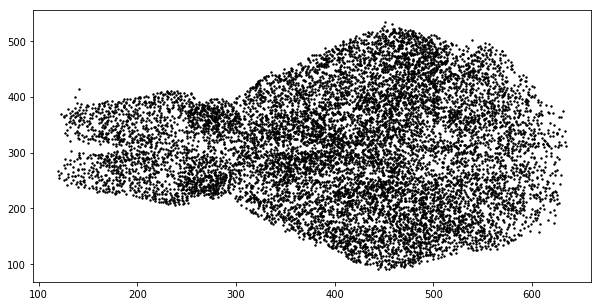

Done PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01


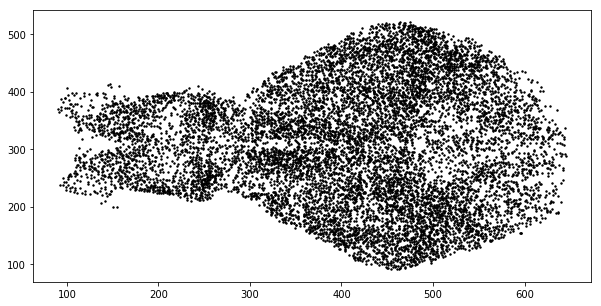

Done PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01


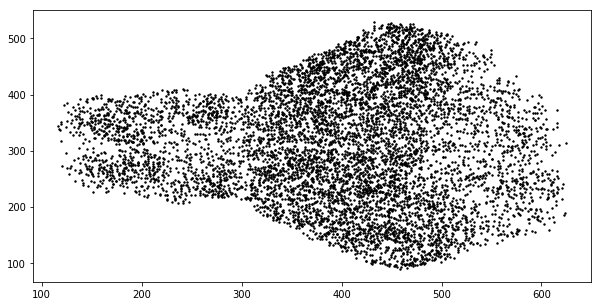

Done PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01


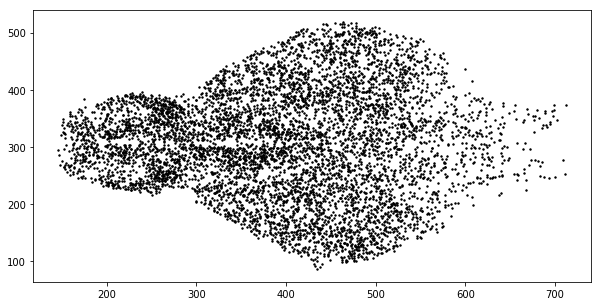

Done PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01


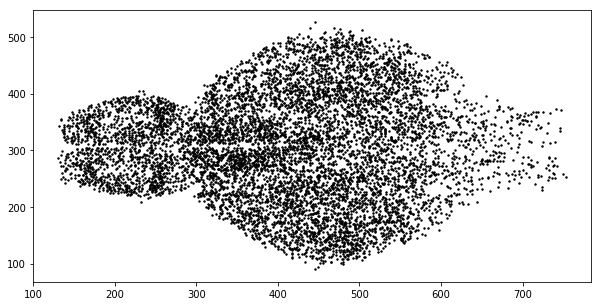

Done PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01


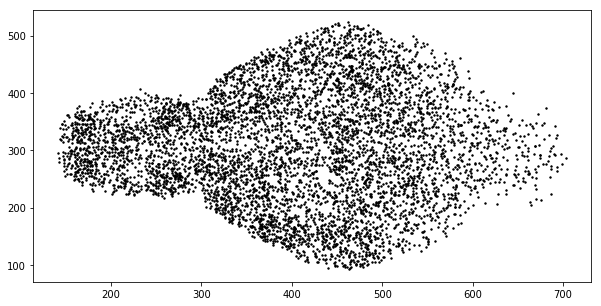

Done PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01


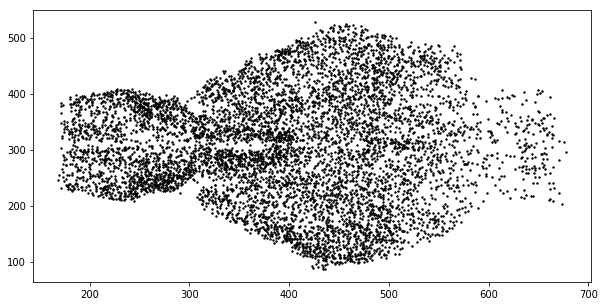

Done PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01


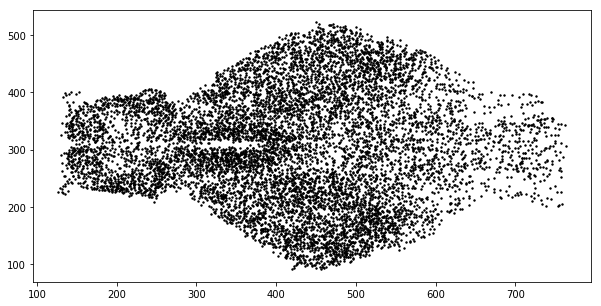

Done PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01


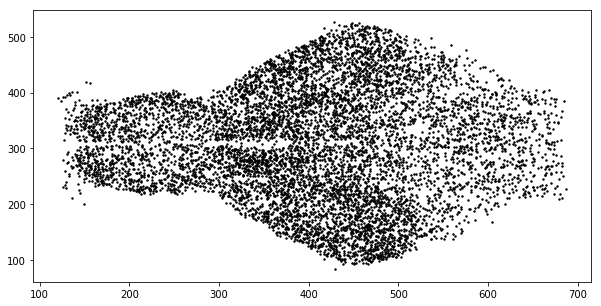

Done PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01


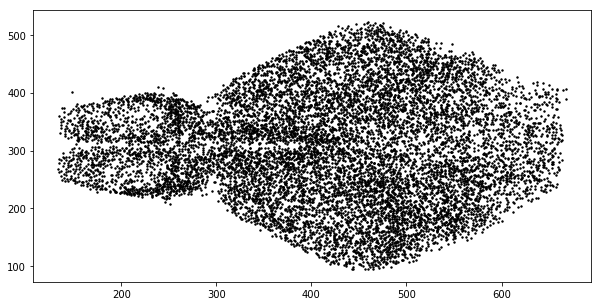

Done PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01


In [ ]:
#Save dict containing all data and hdf5 files for CCM

for i in range(len(co_l)):
    co = np.load(co_l[i])
    tr = np.load(tr_l[i])
    dff = np.load(dff_l[i])
    name = adfn.save_name(co_l[i])
    f_dict = cfn.CCM_sort(co, tr, dff, name, pref)
    
    plt.figure(figsize = (10,5))
    plt.scatter(f_dict['coord'][:,1], f_dict['coord'][:,0], s = 2, color = 'k')
    plt.show()
    
    print('Done ' + name)

# Load CCM data

In [85]:
import h5py
data_list = adfn.return_files(Fdata, 'PTZCON-WILDTYPE', '*xmap*')
CCM_dict = { 'Combined' :  h5py.File(data_list[0], 'r'), 'BLN' : h5py.File(data_list[1], 'r'), 
            'PTZ05' : h5py.File(data_list[2], 'r'), 'PTZ20' : h5py.File(data_list[3], 'r') }
data_list, CCM_dict

(['F01_bln_xmap.h5', 'F01_pre_xmap.h5', 'F01_sz_xmap.h5', 'F01_xmap.h5'],
 {'Combined': <HDF5 file "F01_bln_xmap.h5" (mode r)>,
  'BLN': <HDF5 file "F01_pre_xmap.h5" (mode r)>,
  'PTZ05': <HDF5 file "F01_sz_xmap.h5" (mode r)>,
  'PTZ20': <HDF5 file "F01_xmap.h5" (mode r)>})

In [212]:
np.load(adfn.return_files(Fdata, 'single', '*CCM*')[0])

array({'mean trace': array([ 375.49642944,  393.1522522 ,  408.3815918 , ...,  291.31784058,
        289.14260864,  288.98989868], dtype=float32), 'trace': array([[ 1101.00158691,   375.26989746,   160.53424072, ...,
          563.22595215,   127.22381592,   208.07672119],
       [  454.70794678,  1038.52539062,   936.51660156, ...,
          417.13150024,   353.54296875,   175.36679077],
       [    1.20363235,   610.88641357,    23.12493896, ...,
           86.47760773,   347.26409912,    28.18405533],
       ..., 
       [  151.80297852,    44.49580383,     1.48486209, ...,
           79.76689911,    19.0133152 ,   224.81855774],
       [   10.48920345,     4.88789368,    81.60852814, ...,
           20.04871368,    11.05779934,    17.84632111],
       [    9.78207397,    33.1052475 ,   475.08184814, ...,
           32.40324783,   157.73413086,    37.58296967]], dtype=float32), 'coord': array([['355.94736842105266', '435.0', '97.52631578947368',
        'Optic tectum - stratum periv

In [34]:
CCM_dict['BLN'].keys()

<KeysViewHDF5 ['ccm', 'embedding', 'rho']>

## Embedding distribution across neurons

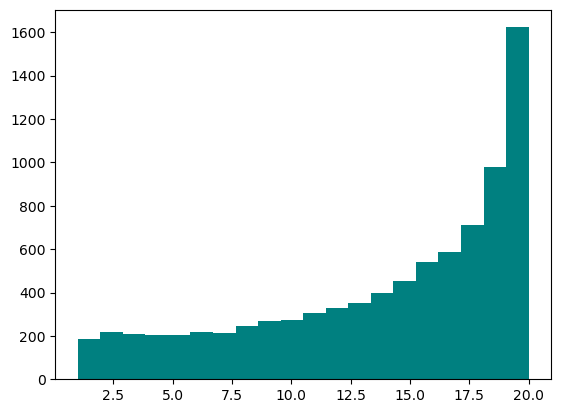

In [65]:
plt.hist(np.array(CCM_dict['Combined']['embedding'])[1:], bins = 20, color = 'teal')
plt.show()

In [98]:
sub_co[:,:3].shape

(11038, 3)

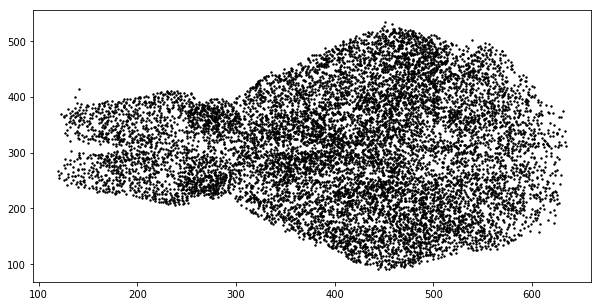

In [95]:
plt.figure(figsize = (10,5))
plt.scatter(sub_co[:,1], sub_co[:,0], s = 2, color = 'k')
plt.show()

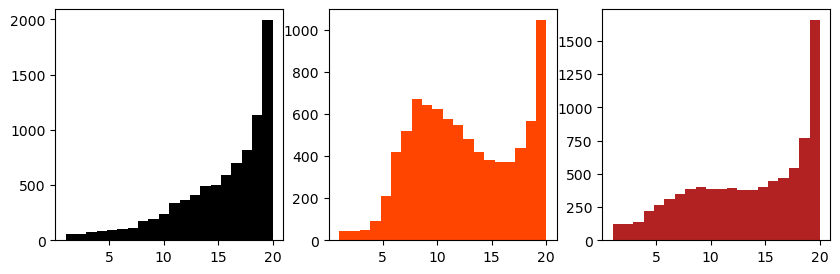

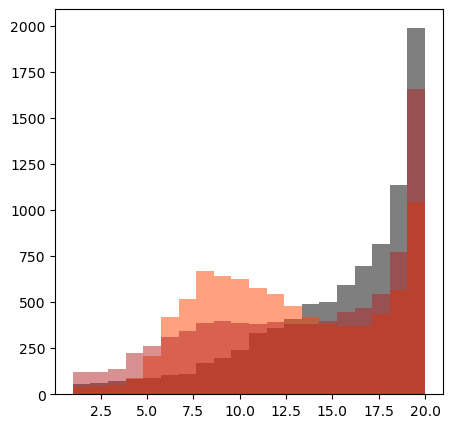

In [66]:
name_list = ['BLN', 'PTZ05', 'PTZ20']
col_list = ['k', 'orangered', 'firebrick']

fig,axarr = plt.subplots(1,3, figsize = (10,3))
for x,name in enumerate(name_list):
    axarr[x].hist(np.array(CCM_dict[name]['embedding'])[1:], bins = 20, color = col_list[x])
plt.show()

fig,axarr = plt.subplots( figsize = (5,5))
for x,name in enumerate(name_list):
    axarr.hist(np.array(CCM_dict[name]['embedding'])[1:], bins = 20, color = col_list[x], alpha = 0.5)
plt.show()

## Brainsum prediction

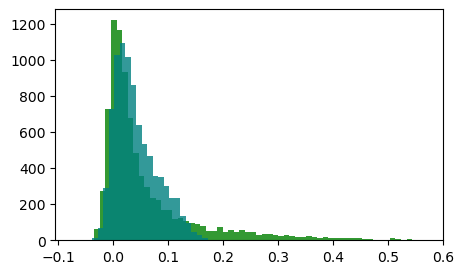

In [67]:
#Check that labelled image has been built correctly
fig,axarr = plt.subplots(figsize = (5,3))
plt.hist(np.array(CCM_dict['Combined']['ccm'])[0,:],  bins = 100, color = 'green', alpha = 0.8)
plt.hist(np.array(CCM_dict['Combined']['ccm'])[:,0],  bins = 100, color = 'teal', alpha = 0.8)
plt.xlim(right = 0.6)
plt.show()

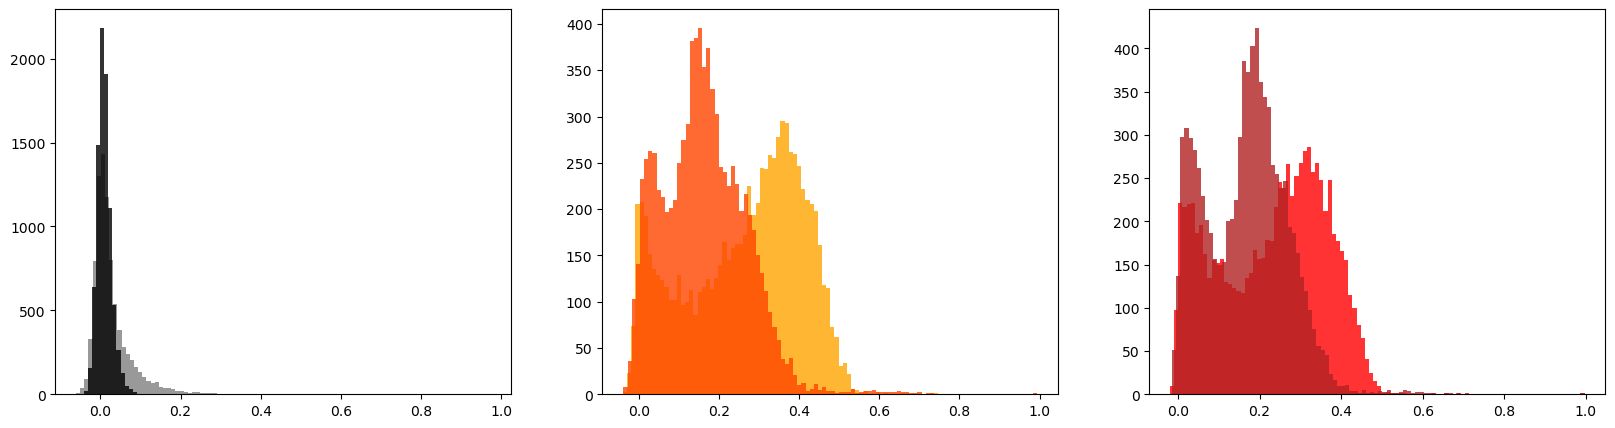

In [75]:
name_list = ['BLN', 'PTZ05', 'PTZ20']
col_list = ['grey', 'k', 'orange', 'orangered', 'red', 'firebrick']

fig,axarr = plt.subplots(1,3, figsize = (20,5))
for x,name in enumerate(name_list):
    axarr[x].hist(np.array(CCM_dict[name]['ccm'])[0,:], bins = 100, color = col_list[x + (x*1)], alpha = 0.8)
    axarr[x].hist(np.array(CCM_dict[name]['ccm'])[:,0], bins = 100, color = col_list[x + 1 + (x*1)], alpha = 0.8)
plt.show()


## Embedding dimension vs prediction skill

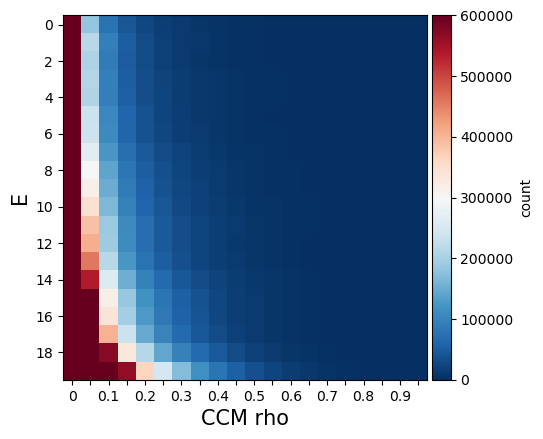

In [93]:
#Plot embedding dimension vs CCM prediction score

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

f, ax = plt.subplots(figsize = (5,5))
plot1 = ax.imshow(cfn.E_ccm_heatmap(np.array(CCM_dict['Combined']['embedding']), np.array(CCM_dict['Combined']['ccm']), 20), cmap = 'RdBu_r', vmax = 600000)#, norm = divnorm)
ax.set_xlabel('CCM rho', size = '15')
ax.set_ylabel('E', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'count')
ax.set_xticklabels(['0', '0' , '', '0.1', '', '0.2', '', '0.3', '', '0.4', '', '0.5', '', '0.6', '', '0.7', '', '0.8', '', '0.9', '', '1'], fontsize = 10)
plt.show()

In [94]:
def heatmap_plot(heatmap,i):
    plot1 = axarr[i].imshow(heatmap, cmap = 'RdBu_r', vmax = 600000)#, norm = divnorm)
    axarr[i].set_xlabel('CCM rho', size = '15')
    axarr[i].set_ylabel('E', size = '15')
    axarr[i].locator_params(axis='y', nbins=10)
    axarr[i].locator_params(axis='x', nbins=20)
    divider = make_axes_locatable(ax)
    cax0 = divider.append_axes("right", size="5%", pad=0.05)
    cbar0 = f.colorbar(plot1, cax=cax0, label = 'count')
    axarr[i].set_xticklabels(['0', '0' , '', '0.1', '', '0.2', '', '0.3', '', '0.4', '', '0.5', '', '0.6', '', '0.7', '', '0.8', '', '0.9', '', '1'], fontsize = 10)


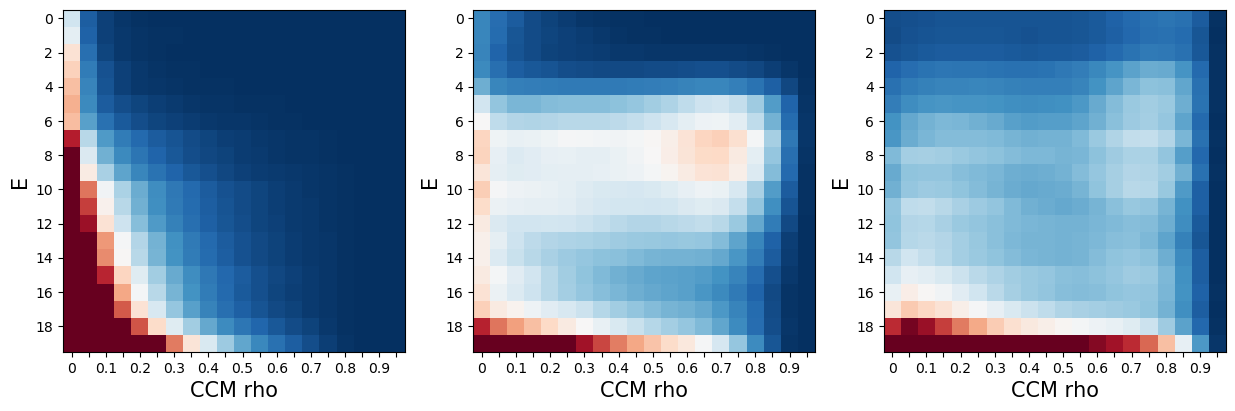

In [98]:
#Plot each codnition
fig,axarr = plt.subplots(1,3, figsize = (15,6))
name_list = ['BLN', 'PTZ05', 'PTZ20']

for i in range(len(name_list)):
    heatmap = cfn.E_ccm_heatmap(np.array(CCM_dict[name_list[i]]['embedding']), np.array(CCM_dict[name_list[i]]['ccm']), 20)
    heatmap_plot(heatmap, i)
plt.show()

## Nonlinearity residuals - CCM minus linear correlation
 

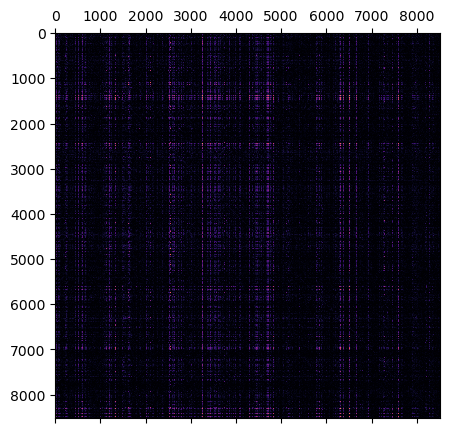

In [105]:
import matplotlib
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,5))
axarr.matshow(abs(abs(np.array(CCM_dict['Combined']['ccm'])) - abs(np.array(CCM_dict['Combined']['rho']))), cmap = 'magma')
plt.show()

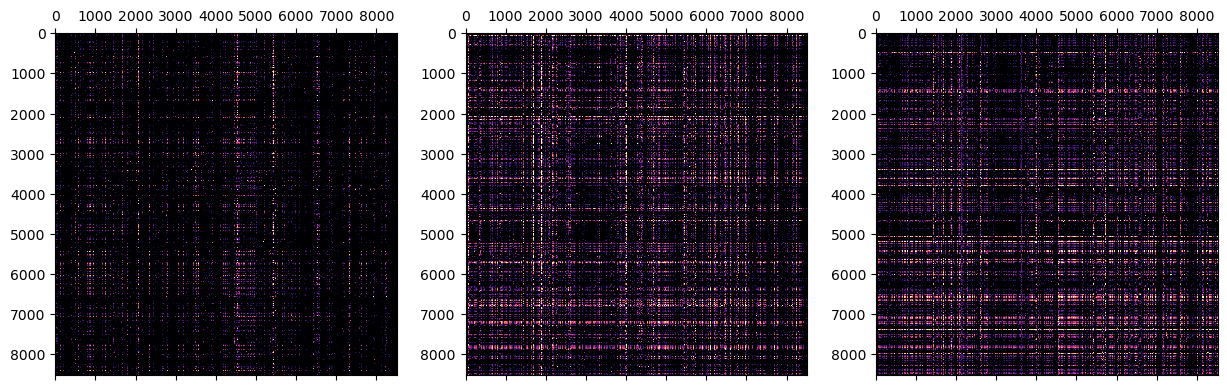

In [106]:
import matplotlib
from matplotlib import cm
fig,axarr = plt.subplots(1,3, figsize = (15,6))
name_list = ['BLN', 'PTZ05', 'PTZ20']

for i in range(len(name_list)):
    axarr[i].matshow(abs(abs(np.array(CCM_dict[name_list[i]]['ccm'])) - abs(np.array(CCM_dict[name_list[i]]['rho']))), 
                     cmap = 'magma', vmin = 0.1, vmax = 0.4)
plt.show()

## Spatial map

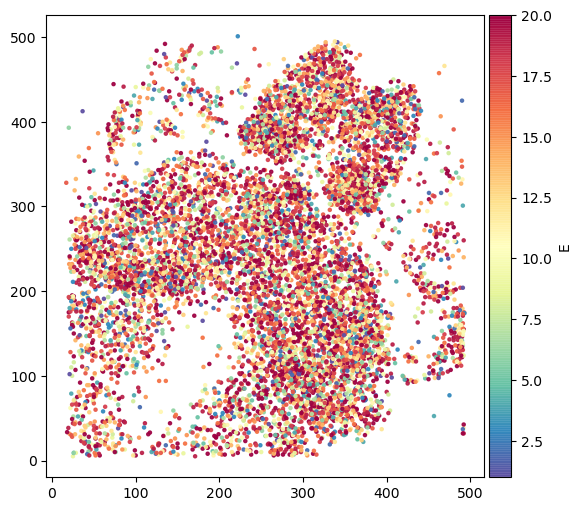

In [122]:
#plot neurons by embedding 
coord = np.load(coordlist[0])
col = CCM_dict['Combined']['embedding'][1:] #define color

fig,axarr = plt.subplots(figsize = (6,6))
plot1 = axarr.scatter(coord[:,0],coord[:,1], s = 5, alpha = 0.9, c = col, cmap = 'Spectral_r')
divider = make_axes_locatable(axarr)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'E')
plt.show()

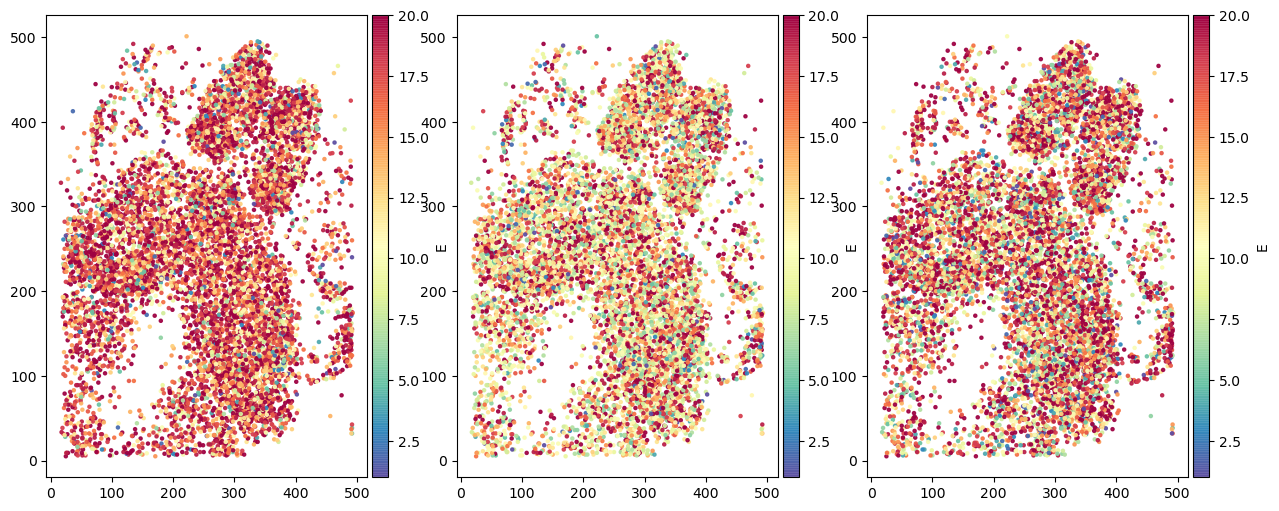

In [112]:
name_list = ['BLN', 'PTZ05', 'PTZ20']
fig,axarr = plt.subplots(1,3, figsize = (15,6))

for i in range(len(name_list)):
    col = CCM_dict[name_list[i]]['embedding'][1:]
    plot = axarr[i].scatter(coord[:,0],coord[:,1], s = 5, alpha = 0.9, c = col, cmap = 'Spectral_r')
    divider = make_axes_locatable(axarr[i])
    cax0 = divider.append_axes("right", size="5%", pad=0.05)
    cbar0 = f.colorbar(plot, cax=cax0, label = 'E')
plt.show()